# Kaggle dataset loader set

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# !kaggle datasets download 'lgg-mri-segmentation/kaggle_3m'

In [ ]:
# _import os
# import glob
# from kaggle.api.kaggle_api_extended import KaggleApi

# # Initialize Kaggle API
# api = KaggleApi()
# api.authenticate()

# # Search for the dataset
# dataset_name = 'lgg-mri-segmentation'

# # Download metadata about the dataset
# # dataset_metadata = api.dataset_view(dataset_name)
# # dataset_metadata = api.dataset_metadata(dataset_name)
# dataset_metadata = api.dataset_info(dataset_name)

# # Extract dataset path
# dataset_path = dataset_metadata.files[0].path.split('/')[0]

# # List files in the dataset
# files = api.dataset_list_files(dataset_name)

# # Filter mask files
# mask_files = [file.path for file in files if '_mask' in file.path]

# # Extract brain scans from mask file names
# brain_scans = [i.replace('_mask', '') for i in mask_files]

# print(brain_scans[:10])
# print(mask_files[:10])


In [ ]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

Dataset URL: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation
License(s): CC-BY-NC-SA-4.0
100% 713M/714M [00:33<00:00, 23.8MB/s]
100% 714M/714M [00:33<00:00, 22.1MB/s]


In [ ]:
!unzip lgg-mri-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_55_mask.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_57.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_57_mask.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_58.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_58_mask.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_5_mask.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_6.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_6_mask.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_7.tif  
  inflating: kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_7_mask.tif  
  infla

# model

In [ ]:
import glob
# Make objects with the images and masks.
brain_scans = []
dataset_path = "/content/kaggle_3m/"
mask_files = glob.glob(dataset_path + '*/*_mask*')
# mask_files = glob.glob('../kaggle/lgg-mri-segmentation/kaggle_3m/*/*_mask*')

for i in mask_files:
    brain_scans.append(i.replace('_mask',''))

print(brain_scans[:10])
print(mask_files[:10])

['/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_50.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_25.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_15.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_14.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_58.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_38.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_17.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_48.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_16.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_10.tif']
['/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_50_mask.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_25_mask.tif', '/content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_FG_6690_20020226_15_mask.tif', '/content/kaggle_3m/TCGA_FG_6690_2

In [ ]:
import pandas as pd
img_df = pd.DataFrame({
    "image_path":brain_scans,
    "mask_path":mask_files
})

In [ ]:
import cv2
import numpy as np
def positive_negative_diagnosis(file_masks):
    mask = cv2.imread(file_masks)
    value = np.max(mask)
    if value > 0:
        return 1
    else:
        return 0

# Apply the function to the masks and return back a column with 1 and zeros, where 0 indicate no tumor and 1 a tumor.
img_df["Tumor"] = img_df["mask_path"].apply(lambda x: positive_negative_diagnosis(x))

In [ ]:
img_df

image_path  \
0     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...   
1     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...   
2     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...   
3     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...   
4     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...   
...                                                 ...   
3924  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...   
3925  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...   
3926  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...   
3927  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...   
3928  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...   

                                              mask_path  Tumor  
0     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...      0  
1     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...      1  
2     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...      0  
3     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...      0  
4     /content/kaggle_3m/TCGA_FG_6690_20020226/TCGA_...      0  
...                                                 ...    ...  
3924  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...      0  
3925  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...      1  
3926  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...      0  
3927  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...      1  
3928  /content/kaggle_3m/TCGA_FG_A4MU_20030903/TCGA_...      0  

[3929 rows x 3 columns]

In [ ]:
img_df["Tumor"].value_counts()

Tumor
0    2556
1    1373
Name: count, dtype: int64

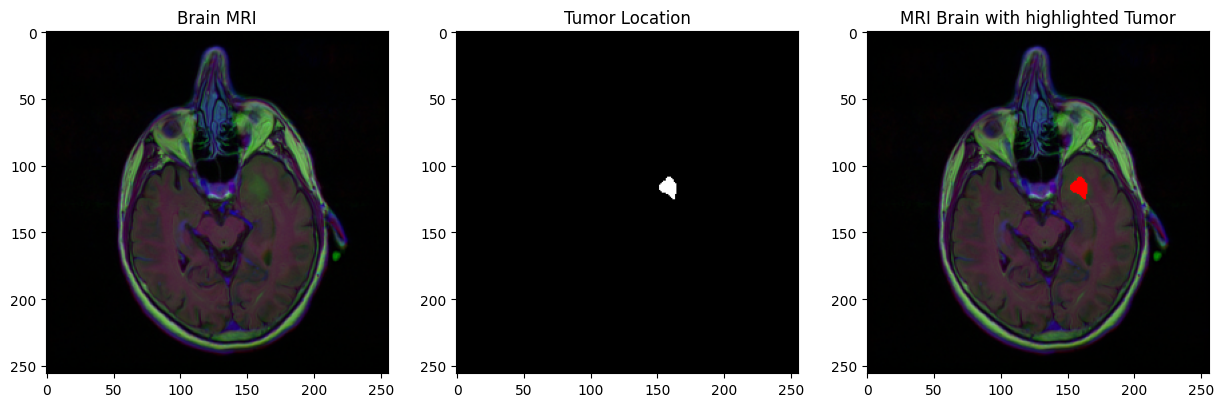

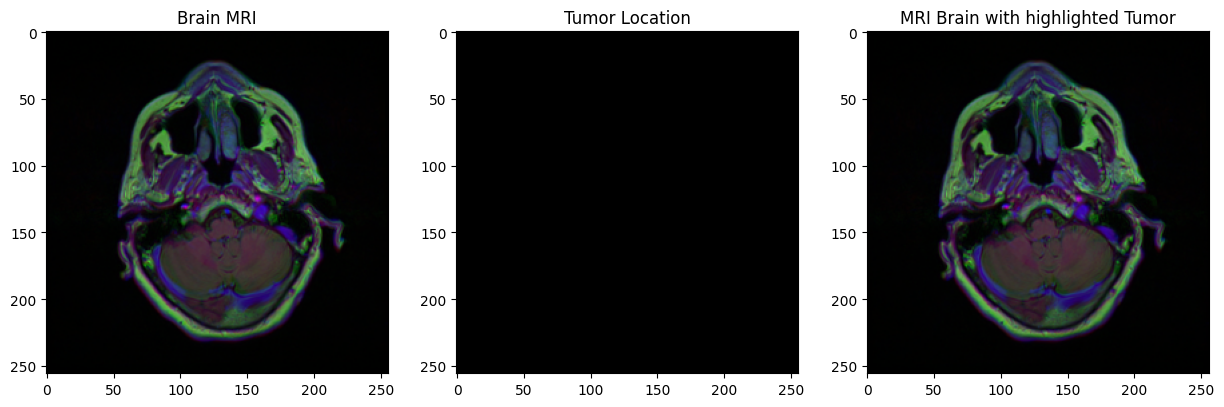

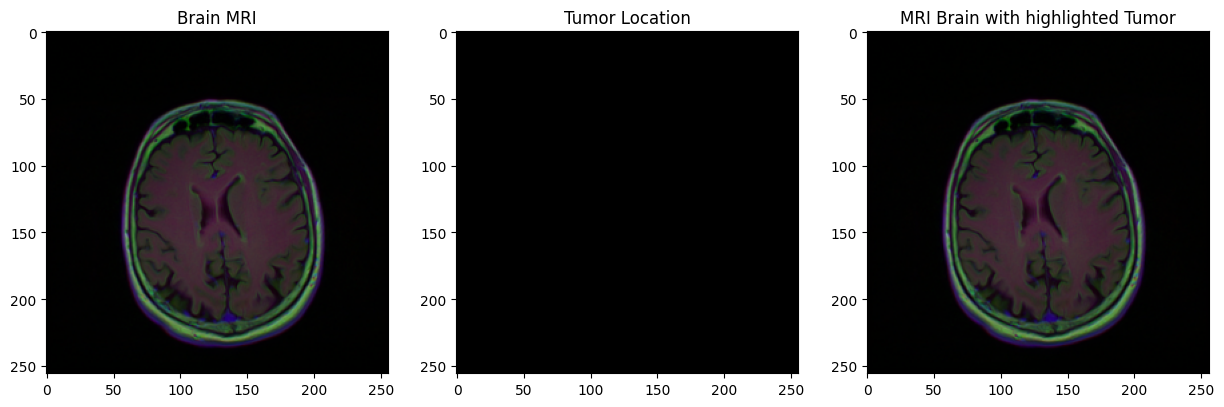

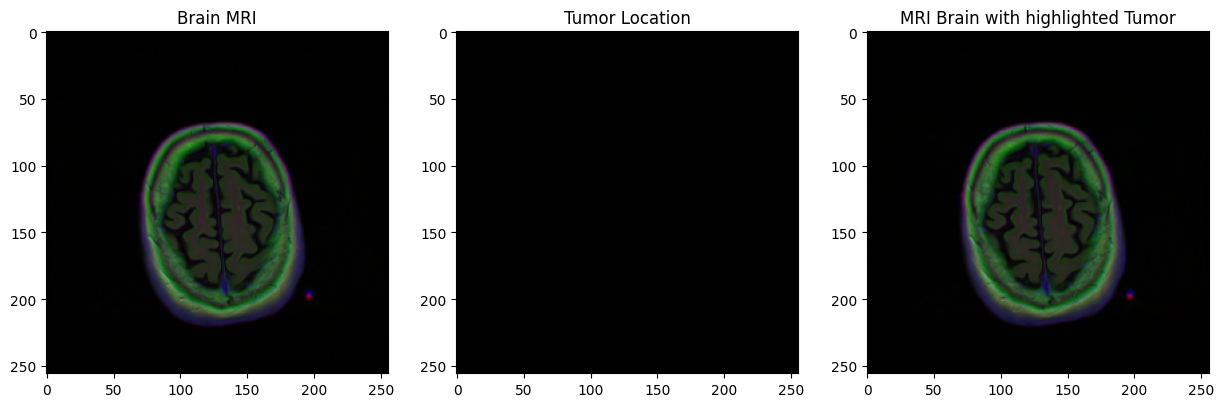

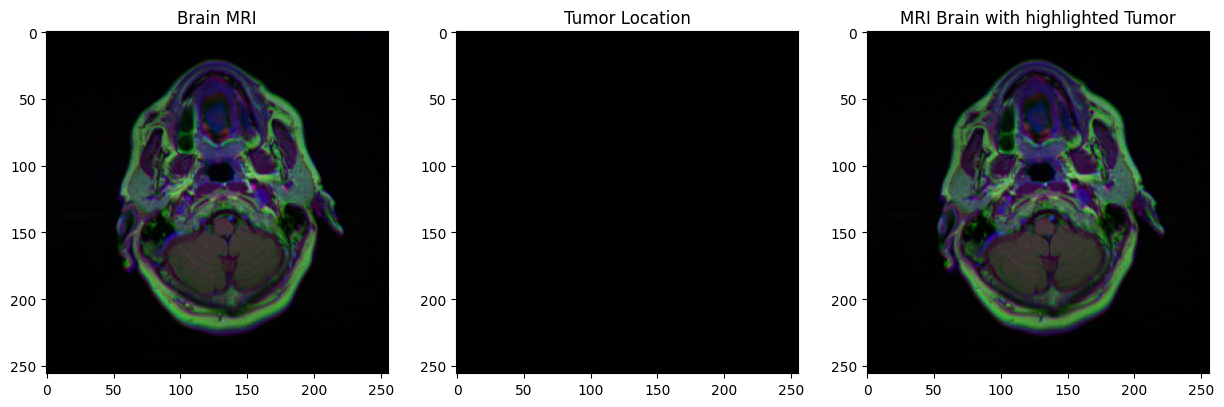

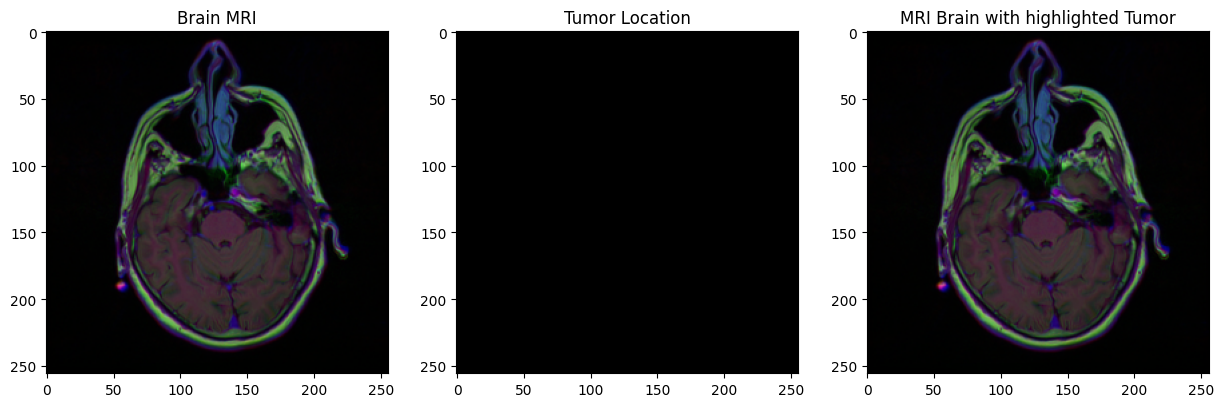

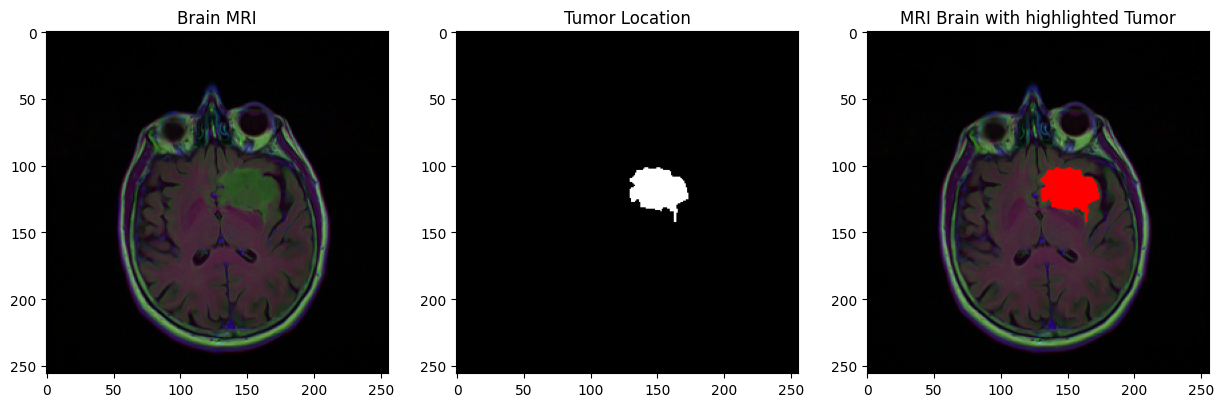

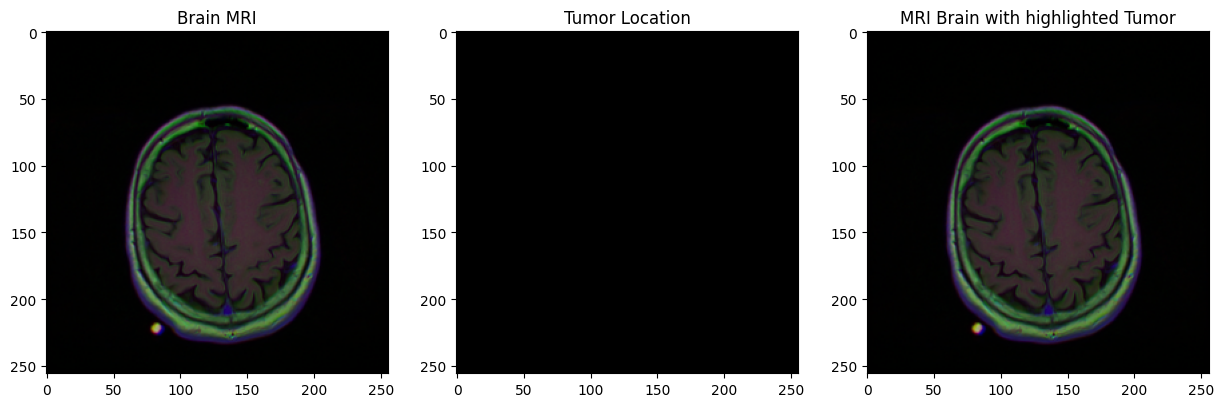

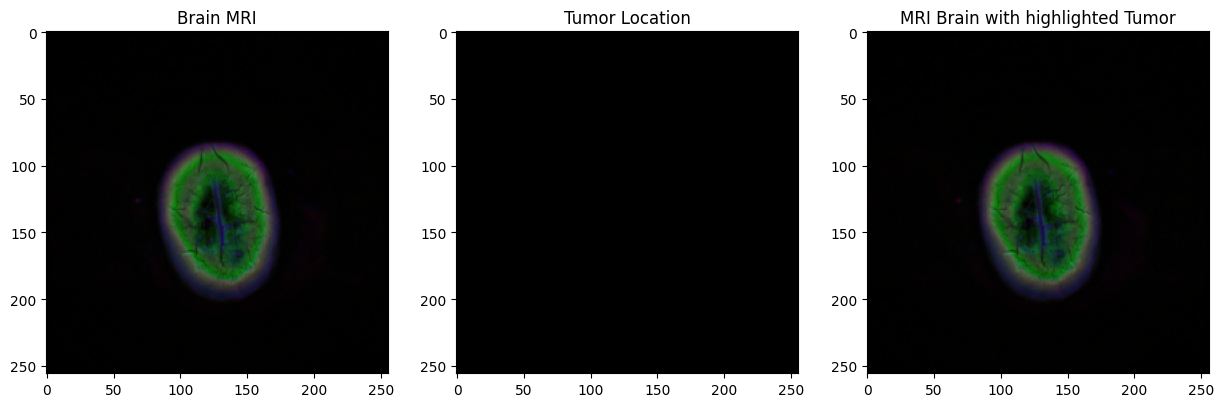

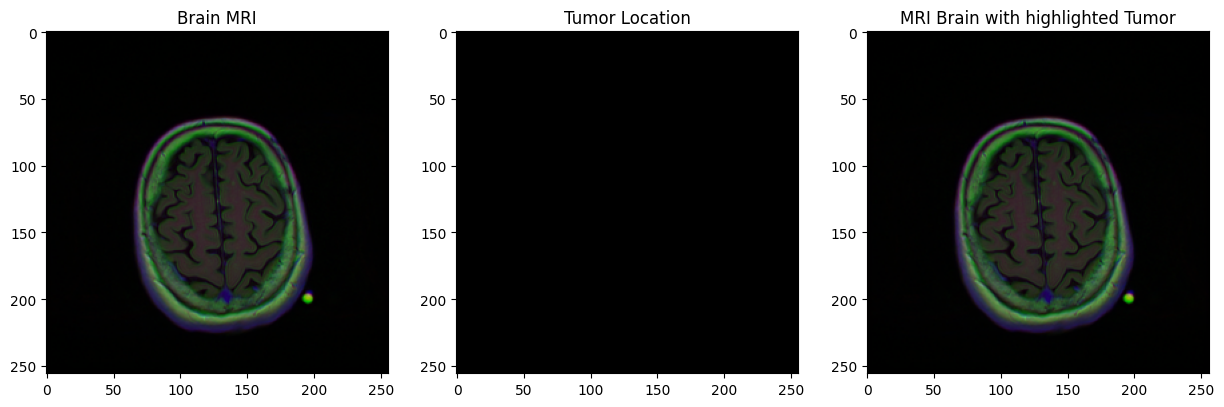

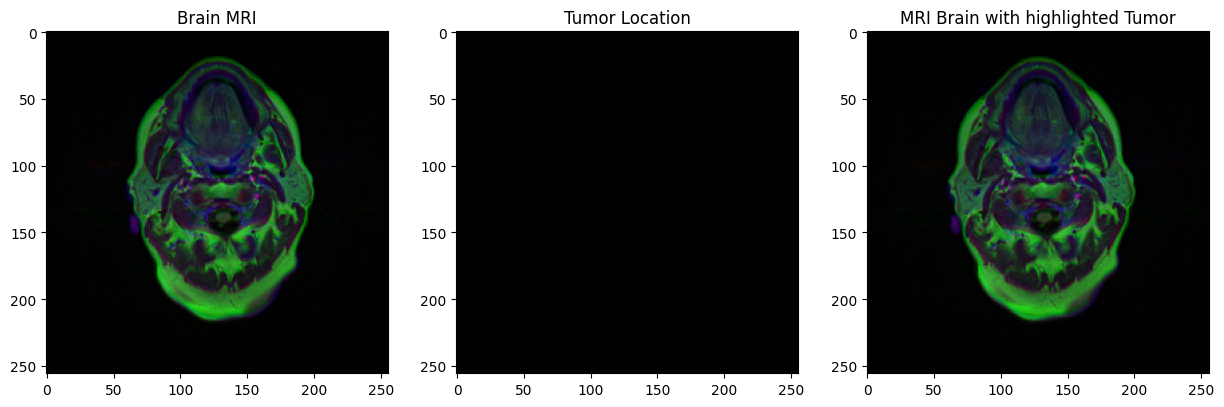

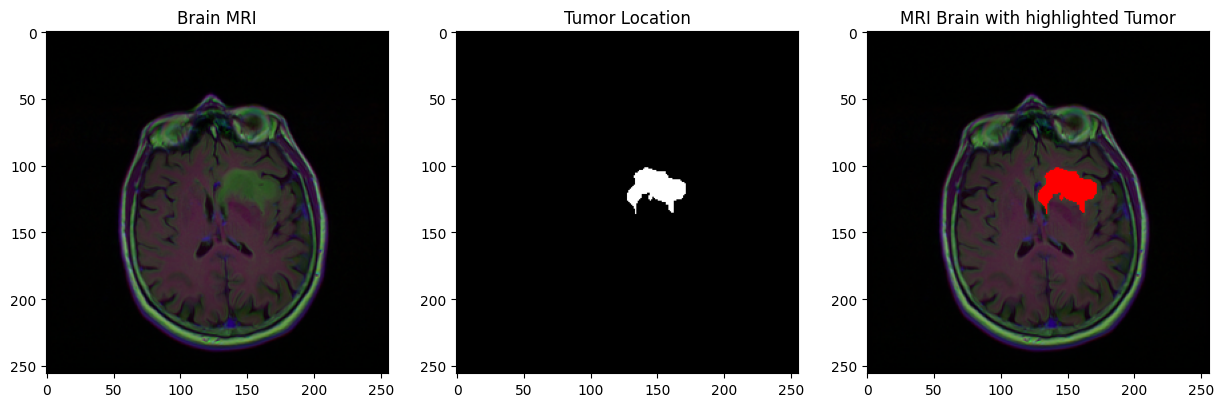

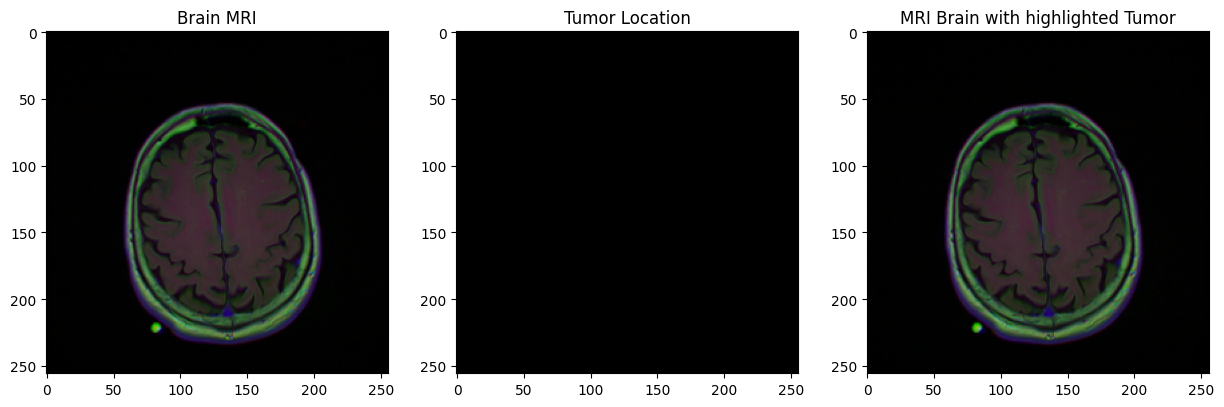

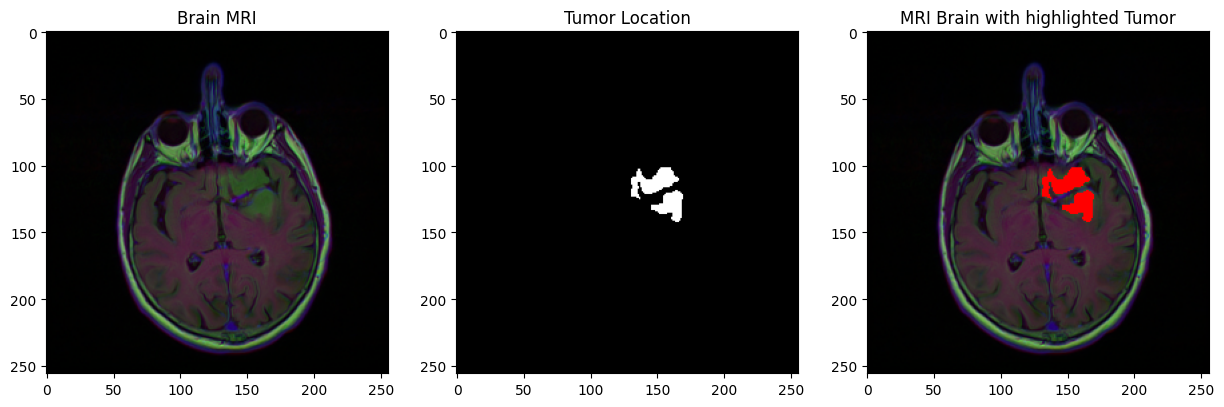

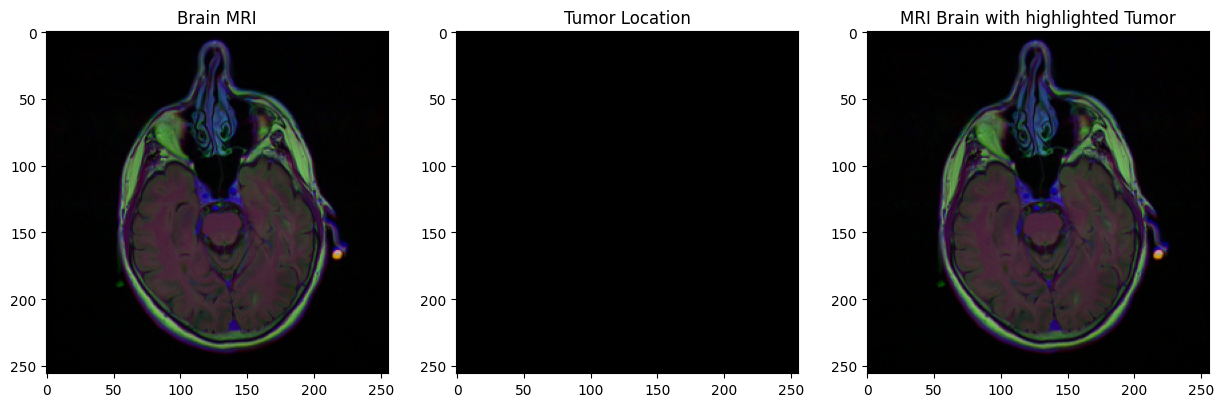

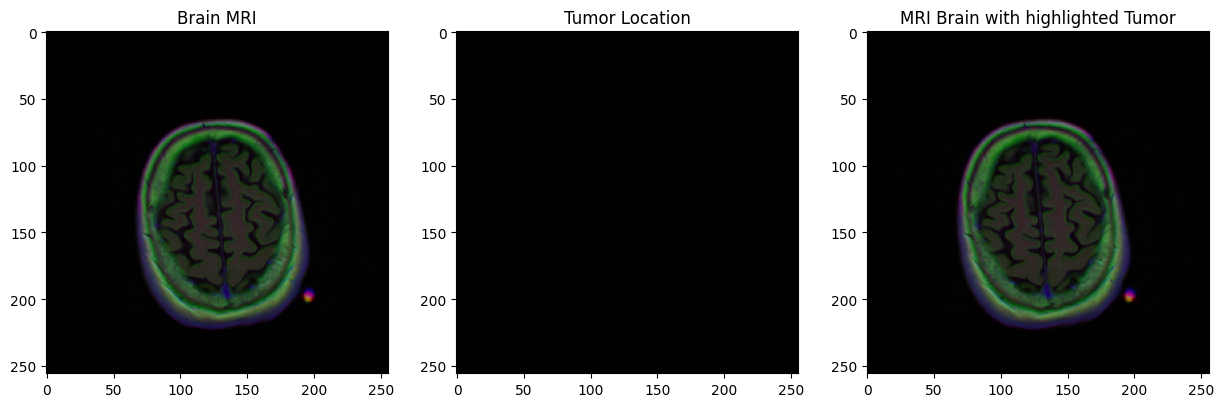

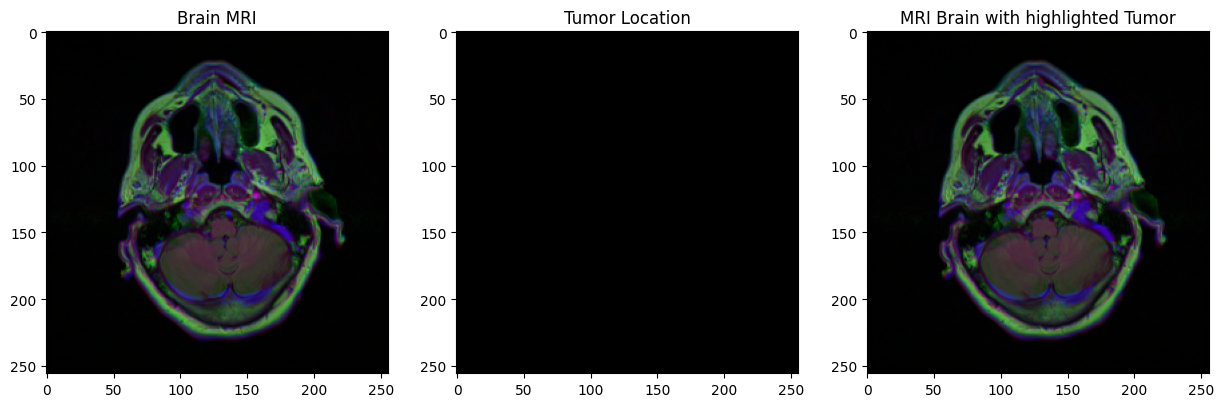

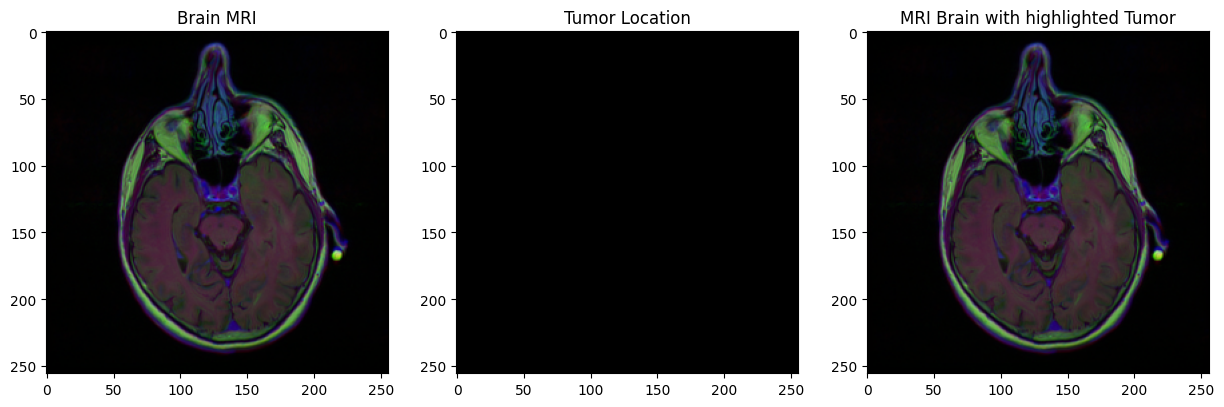

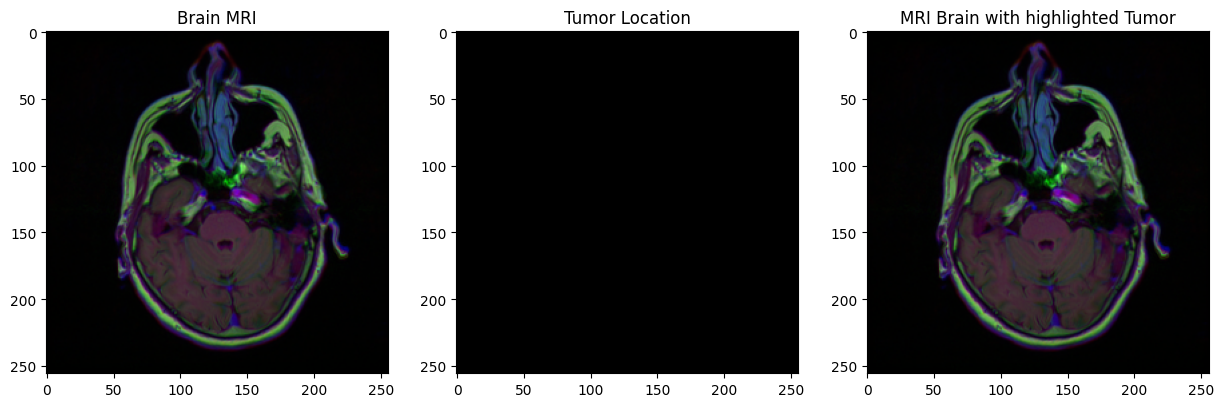

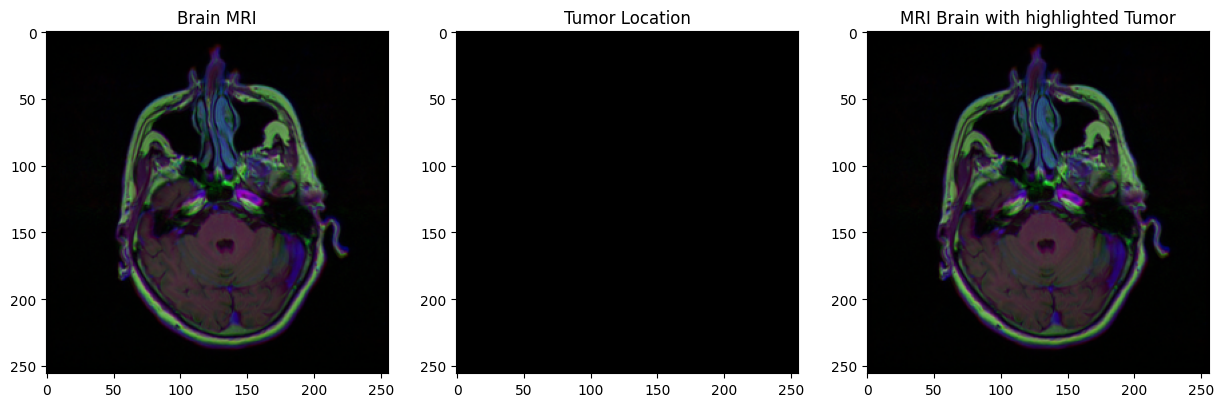

In [ ]:
import matplotlib.pyplot as plt

for i in range(1,40, 2):
    img_path=brain_scans[i]
    msk_path=mask_files[i]
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)

    #Plot the Brain MRI scans
    original = img.copy()
    fig, ax = plt.subplots(1,3,figsize = (15,5))
    ax[0].imshow(original)
    ax[0].set_title("Brain MRI")

    # Plot the corresponding mask
    main = original.copy()
    mask = msk.copy()
    ax[1].imshow(mask)
    ax[1].set_title("Tumor Location")

    # Plot the Brain MRI scan with their mask
    main = original.copy()
    label = cv2.imread(msk_path)
    sample = np.array(np.squeeze(label), dtype = np.uint8)
    contours, hier = cv2.findContours(sample[:,:,0],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    sample_over_gt = cv2.drawContours(main, contours, -1,[255,0,0], thickness=-1)
    ax[2].imshow(sample_over_gt)
    ax[2].set_title("MRI Brain with highlighted Tumor")

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(img_df,test_size = 0.1)
train, val = train_test_split(train,test_size = 0.2)
print(train.values.shape)
print(val.values.shape)
print(test.values.shape)

train.head()
val.head()

(2828, 3)
(708, 3)
(393, 3)


image_path  \
668   /content/kaggle_3m/TCGA_DU_7014_19860618/TCGA_...   
1281  /content/kaggle_3m/TCGA_DU_6399_19830416/TCGA_...   
1117  /content/kaggle_3m/TCGA_DU_8163_19961119/TCGA_...   
757   /content/kaggle_3m/TCGA_DU_8165_19970205/TCGA_...   
1261  /content/kaggle_3m/TCGA_DU_6399_19830416/TCGA_...   

                                              mask_path  Tumor  
668   /content/kaggle_3m/TCGA_DU_7014_19860618/TCGA_...      0  
1281  /content/kaggle_3m/TCGA_DU_6399_19830416/TCGA_...      1  
1117  /content/kaggle_3m/TCGA_DU_8163_19961119/TCGA_...      1  
757   /content/kaggle_3m/TCGA_DU_8165_19970205/TCGA_...      0  
1261  /content/kaggle_3m/TCGA_DU_6399_19830416/TCGA_...      1

In [ ]:
img_df['Tumor'] = img_df['Tumor'].apply(lambda x: str(x))
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   Tumor       3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [ ]:
# SOURCE: https://github.com/zhixuhao/unet/blob/master/data.py
from keras.preprocessing.image import ImageDataGenerator


def train_generator(data_frame, batch_size, aug_dict,
        image_color_mode="rgb",
        mask_color_mode="grayscale",
        image_save_prefix="image",
        mask_save_prefix="mask",
        save_to_dir=None,
        target_size=(256,256),
        seed=1):
    '''
    can generate image and mask at the same time use the same seed for
    image_datagen and mask_datagen to ensure the transformation for image
    and mask is the same if you want to visualize the results of generator,
    set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image_path",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask_path",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)

    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return (img, mask)

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32
im_height = 256
im_width = 256

In [ ]:
train_generator_args = dict(width_shift_range=0.05,
                            height_shift_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest'
                           )


train_gen = train_generator(train, BATCH_SIZE,
                            train_generator_args,
                            target_size=(im_height,
                            im_width)
                           )


test_gen = train_generator(val, BATCH_SIZE,
                            dict(),
                            target_size=(im_height, im_width)
                            )

In [ ]:
from tensorflow import keras
import tensorflow.keras.backend as K
smooth=100

def dice_coef(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)
    And=K.sum(y_truef* y_predf)
    return((2* And + smooth) / (K.sum(y_truef) + K.sum(y_predf) + smooth))

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jac_distance(y_true, y_pred):
    y_truef=K.flatten(y_true)
    y_predf=K.flatten(y_pred)

    return - iou(y_true, y_pred)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
def unet(input_size=(256,256,3)):

    # Input
    inputs = Input(input_size)

    # Stage 1
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    bn1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, (3, 3), padding='same')(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    # Stage 2
    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    bn2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, (3, 3), padding='same')(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation('relu')(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    # Stage 3
    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    bn3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, (3, 3), padding='same')(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation('relu')(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    # Stage 4
    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    bn4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, (3, 3), padding='same')(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation('relu')(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    # Stage 5
    conv5 = Conv2D(1024, (3, 3), padding='same')(pool4)
    bn5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, (3, 3), padding='same')(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation('relu')(bn5)

    # Upstage 1
    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding='same')(up6)
    bn6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, (3, 3), padding='same')(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation('relu')(bn6)

    # Upstage 2
    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding='same')(up7)
    bn7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, (3, 3), padding='same')(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation('relu')(bn7)

    # Upstage 3
    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding='same')(up8)
    bn8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, (3, 3), padding='same')(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation('relu')(bn8)

    # Upstage 4
    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding='same')(up9)
    bn9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, (3, 3), padding='same')(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation('relu')(bn9)

    # Output
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
model = unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['activation[0][0]']          
                                                                                              

In [ ]:
# Define reducelr function to reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=15,
                              min_delta=0.0001,
                              factor=0.2
                             )

# Define the earltstop function
earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              mode='min',
                              verbose=1,
                              patience=20,
                              restore_best_weights = True
                             )

# Defining the Callbacks Function

checkpointer2 = [ModelCheckpoint('/content/drive/My Drive/unet_brain_mri_seg.keras', verbose=1, save_best_only=True)]
callbacks = [checkpointer2, earlystopping, reduce_lr]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from keras.callbacks import ModelCheckpoint

# Define the number of epochs for each batch
batch_epochs = 10
total_epochs = 100

# # Initialize an empty dictionary to store the accumulated training history
accumulated_history = {}

# # Initialize variables to keep track of the current batch and epoch
current_batch = 10

for i in range(total_epochs // batch_epochs):
    print(f"Training for epochs {current_batch + 1} to {current_batch + batch_epochs}")

    # Load or create a new model
    if current_batch == 0:
        model = unet(input_size=(im_height, im_width, 3))
    else:
        # Load the model weights from the previous run
        model.load_weights(f"/content/drive/My Drive/model_weights_epoch_{current_batch}.h5")

    # Compile the model
    model.compile(optimizer='adam', loss=dice_coef_loss, metrics=["binary_accuracy", iou, dice_coef])

    # Set up callbacks to save model weights after each batch of epochs
    checkpoint = ModelCheckpoint(f"/content/drive/My Drive/model_weights_epoch_{current_batch + batch_epochs}.h5",
                                 monitor='val_loss',
                                 save_best_only=True,
                                 mode='min')

    # Train the model for the current batch of epochs
    history = model.fit(train_gen,
                        steps_per_epoch=len(train) // BATCH_SIZE,
                        epochs=batch_epochs,
                        validation_data=test_gen,
                        validation_steps=len(val) // BATCH_SIZE,
                        callbacks=[checkpoint])

    # Accumulate the training history
    for key in history.history:
        if key not in accumulated_history:
            accumulated_history[key] = []
        accumulated_history[key].extend(history.history[key])

    # Update the current batch number
    current_batch += batch_epochs
    print("cuurent running batch:",current_batch)
    np.save(f"/content/drive/My Drive/accumulated_history_{current_batch + batch_epochs}.npy", accumulated_history)

# Save the accumulated training history
np.save("/content/drive/My Drive/accumulated_history.npy", accumulated_history)


Training for epochs 11 to 20
Epoch 1/10
88/88 [==============================] - 153s 2s/step - loss: -0.6890 - binary_accuracy: 0.9942 - iou: 0.5347 - dice_coef: 0.6884 - val_loss: -0.7127 - val_binary_accuracy: 0.9940 - val_iou: 0.5616 - val_dice_coef: 0.7127
Epoch 2/10
88/88 [==============================] - 150s 2s/step - loss: -0.7194 - binary_accuracy: 0.9948 - iou: 0.5692 - dice_coef: 0.7187 - val_loss: -0.4722 - val_binary_accuracy: 0.9918 - val_iou: 0.3069 - val_dice_coef: 0.4570
Epoch 3/10
88/88 [==============================] - 141s 2s/step - loss: -0.7232 - binary_accuracy: 0.9949 - iou: 0.5740 - dice_coef: 0.7220 - val_loss: -0.6792 - val_binary_accuracy: 0.9938 - val_iou: 0.5095 - val_dice_coef: 0.6647
Epoch 4/10
88/88 [==============================] - 150s 2s/step - loss: -0.7480 - binary_accuracy: 0.9953 - iou: 0.6055 - dice_coef: 0.7488 - val_loss: -0.7757 - val_binary_accuracy: 0.9947 - val_iou: 0.6363 - val_dice_coef: 0.7712
Epoch 5/10
88/88 [=====================

In [ ]:
print(current_btach)

In [ ]:
# model = unet(input_size=(im_height, im_width, 3))


# model.compile(optimizer='adam', loss=dice_coef_loss, metrics=["binary_accuracy", iou, dice_coef])

# history = model.fit(train_gen,
#                     steps_per_epoch = len(train) / BATCH_SIZE,
#                     epochs=EPOCHS,
#                     validation_data = test_gen,
#                     validation_steps = len(val) / BATCH_SIZE,
#                     callbacks = callbacks)

# MODIFIED MODEL

In [ ]:
def unet_modified(input_size=(256,256,3)):

    # Input
    inputs = Input(input_size)

    # Stage 1
    conv1 = Conv2D(64, (3, 3), padding='same')(inputs)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, (3, 3), padding='same')(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation('relu')(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    # Stage 2
    conv2 = Conv2D(128, (3, 3), padding='same')(pool1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, (3, 3), padding='same')(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation('relu')(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    # Stage 3
    conv3 = Conv2D(256, (3, 3), padding='same')(pool2)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn3 = Activation('relu')(conv3)
    conv3 = Conv2D(256, (3, 3), padding='same')(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation('relu')(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    # Stage 4
    conv4 = Conv2D(512, (3, 3), padding='same')(pool3)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn4 = Activation('relu')(conv4)
    conv4 = Conv2D(512, (3, 3), padding='same')(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation('relu')(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    # Stage 5
    conv5 = Conv2D(1024, (3, 3), padding='same')(pool4)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn5 = Activation('relu')(conv5)
    conv5 = Conv2D(1024, (3, 3), padding='same')(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation('relu')(bn5)

    # Upstage 1
    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = Conv2D(512, (3, 3), padding='same')(up6)
    bn6 = Activation('relu')(conv6)
    conv6 = Conv2D(512, (3, 3), padding='same')(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation('relu')(bn6)

    # Upstage 2
    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = Conv2D(256, (3, 3), padding='same')(up7)
    bn7 = Activation('relu')(conv7)
    conv7 = Conv2D(256, (3, 3), padding='same')(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation('relu')(bn7)

    # Upstage 3
    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = Conv2D(128, (3, 3), padding='same')(up8)
    bn8 = Activation('relu')(conv8)
    conv8 = Conv2D(128, (3, 3), padding='same')(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation('relu')(bn8)

    # Upstage 4
    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = Conv2D(64, (3, 3), padding='same')(up9)
    bn9 = Activation('relu')(conv9)
    conv9 = Conv2D(64, (3, 3), padding='same')(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation('relu')(bn9)

    # Output
    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
model = unet_modified()

In [ ]:
model = unet_modified(input_size=(im_height, im_width, 3))


model.compile(optimizer='adam', loss=dice_coef_loss, metrics=["binary_accuracy", iou, dice_coef])

history = model.fit(train_gen,
                    steps_per_epoch = len(train) / BATCH_SIZE,
                    epochs=10,
                    validation_data = test_gen,
                    validation_steps = len(val) / BATCH_SIZE,
                    callbacks = callbacks)

Epoch 1/10
89/88 [==============================] - ETA: -1s - loss: -0.1689 - binary_accuracy: 0.9371 - iou: 0.0967 - dice_coef: 0.1703
Epoch 1: val_loss did not improve from -0.32461
88/88 [==============================] - 181s 2s/step - loss: -0.1689 - binary_accuracy: 0.9371 - iou: 0.0967 - dice_coef: 0.1703 - val_loss: -0.0379 - val_binary_accuracy: 0.9904 - val_iou: 0.0189 - val_dice_coef: 0.0366 - lr: 0.0010
Epoch 2/10
57/88 [==================>...........] - ETA: 53s - loss: -0.4268 - binary_accuracy: 0.9892 - iou: 0.2812 - dice_coef: 0.4268

KeyboardInterrupt: 